In [2]:
# --- upgrade pip
!python -m pip install --upgrade pip

# --- pin numpy to TF-compatible version
!pip uninstall -y numpy
!pip install numpy==1.26.4

# --- core stack (TensorFlow + supporting libraries)
!pip install tensorflow==2.15.0
!pip install scikit-learn==1.4.2 pandas==2.2.2 matplotlib==3.8.4 seaborn==0.13.2


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 47.4 MB/s  0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 25.2
    Uninstalling pip-25.2:
      Successfully uninstalled pip-25.2
Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cytho

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 35.0 MB/s  0:00:12m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 80.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 60.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 65.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 23.3 MB/s  0:00:00m0:00:01
  Attempting uninstall: protobuf━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  1/13 [tensorflow-estimator]
    Found existing installation: protobuf 6.33.0━━━━━━━━━━━━━━  1/13 [tensorflow-estimator]
    Uninstalling protobuf-6.33.0:━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  1/13 [tensorflow-estimator]
      Successfully uninstalled protobuf-6.33.0━━━━━━━━━━━━━━━━  1/13 [tensorflow-estimator]
  Attempting uninstall: ml-dtypes90m━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  3/13 [protobuf]timator]
    Found existing installation: ml_dtypes 0.5.3━━━━━━━━━━━━━━  3/13 [protobuf]
    Uninstalling ml_dtypes-0.5.3:━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
import numpy as np
import tensorflow as tf

print(" NumPy version:", np.__version__)
print(" TensorFlow version:", tf.__version__)


2025-10-31 11:19:44.122840: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-31 11:19:44.152533: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-10-31 11:19:44.152567: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-10-31 11:19:44.153539: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-10-31 11:19:44.159335: I tensorflow/core/platform/cpu_feature_guar

 NumPy version: 1.26.4
 TensorFlow version: 2.15.0


In [4]:
# ---- core
import os, re, json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---- ML / NN
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

# pretty plots
plt.rcParams["figure.figsize"] = (8, 4)
sns.set(style="whitegrid")

DATA_PATH = "train.csv"   # change if you placed it elsewhere
SEED = 42
np.random.seed(SEED)


In [ ]:
#LOAD DATASET

In [5]:
df = pd.read_csv(DATA_PATH)
print("Shape:", df.shape)
df.head()


Shape: (7613, 5)


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


Missing values:
 id             0
keyword       61
location    2533
text           0
target         0
dtype: int64


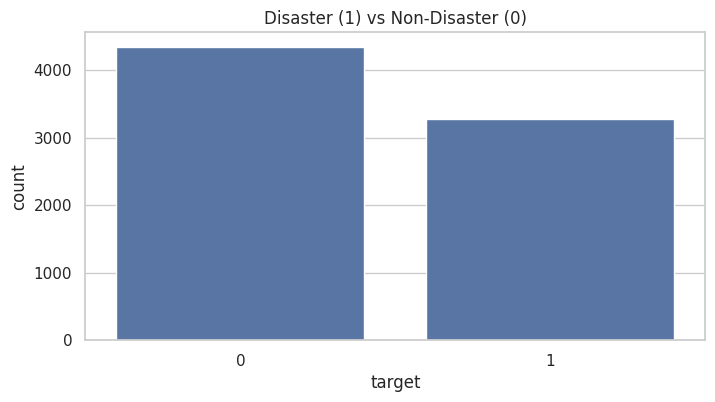

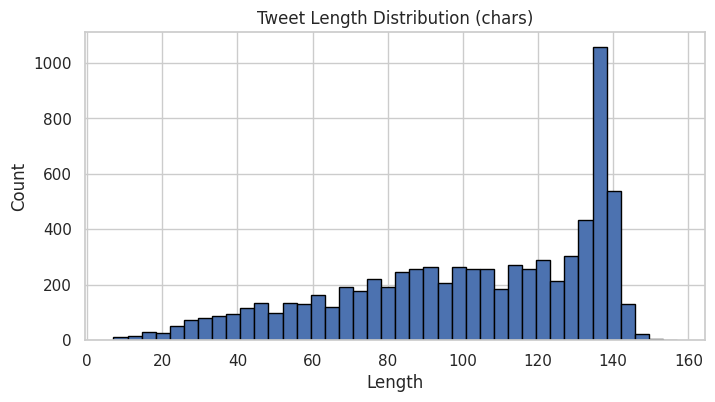

In [6]:
print("Missing values:\n", df.isnull().sum())

# class balance
sns.countplot(x="target", data=df)
plt.title("Disaster (1) vs Non-Disaster (0)")
plt.show()

# tweet length (chars)
df["text_len"] = df["text"].str.len()
plt.hist(df["text_len"], bins=40, edgecolor="black")
plt.title("Tweet Length Distribution (chars)")
plt.xlabel("Length"); plt.ylabel("Count")
plt.show()


In [ ]:
#DATA CLEANING

In [7]:
def clean_text(text: str) -> str:
    text = re.sub(r"http\S+|www\S+", " ", text)      # URLs
    text = re.sub(r"@\w+|#", " ", text)              # mentions & hashtags
    text = re.sub(r"[^A-Za-z\s]", " ", text)         # punctuation/numbers
    text = re.sub(r"\s+", " ", text).strip().lower()
    return text

df["clean_text"] = df["text"].astype(str).apply(clean_text)
df[["text", "clean_text"]].head(5)


,text,clean_text
0,Our Deeds are the Reason of this #earthquake M...,our deeds are the reason of this earthquake ma...
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,all residents asked to shelter in place are be...
3,"13,000 people receive #wildfires evacuation or...",people receive wildfires evacuation orders in ...
4,Just got sent this photo from Ruby #Alaska as ...,just got sent this photo from ruby alaska as s...


In [ ]:
#Tokenize & pad

In [8]:
MAX_VOCAB = 20_000
MAX_LEN   = 64

tokenizer = Tokenizer(num_words=MAX_VOCAB, oov_token="<OOV>")
tokenizer.fit_on_texts(df["clean_text"])

seqs   = tokenizer.texts_to_sequences(df["clean_text"])
padded = pad_sequences(seqs, maxlen=MAX_LEN, padding="post", truncating="post")

print("Vocab size (capped):", min(MAX_VOCAB, len(tokenizer.word_index)))
print("Padded shape:", padded.shape)


Vocab size (capped): 14028
Padded shape: (7613, 64)


In [ ]:
#Train/validation split

In [9]:
X_train, X_val, y_train, y_val = train_test_split(
    padded, df["target"].values,
    test_size=0.20, stratify=df["target"].values, random_state=SEED
)
print("Train:", X_train.shape, " | Val:", X_val.shape)


Train: (6090, 64)  | Val: (1523, 64)


In [ ]:
#Build LSTM baseline

In [10]:
model = Sequential([
    Embedding(input_dim=MAX_VOCAB, output_dim=128, input_length=MAX_LEN),
    Bidirectional(LSTM(64, dropout=0.3, recurrent_dropout=0.3)),
    Dense(64, activation="relu"),
    Dropout(0.4),
    Dense(1, activation="sigmoid"),
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()


2025-10-31 11:22:55.224413: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 64, 128)           2560000   
                                                                 
 bidirectional (Bidirection  (None, 128)               98816     
 al)                                                             
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2667137 (10.17 MB)
Trainable params: 2667137 (10.17 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [ ]:
#TRAIN

In [11]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=5,
    batch_size=64,
    verbose=1
)


Epoch 1/5
96/96 [==============================] - 7s 45ms/step - loss: 0.6004 - accuracy: 0.6744 - val_loss: 0.4475 - val_accuracy: 0.7938
Epoch 2/5
96/96 [==============================] - 4s 42ms/step - loss: 0.3470 - accuracy: 0.8550 - val_loss: 0.4365 - val_accuracy: 0.8122
Epoch 3/5
96/96 [==============================] - 4s 42ms/step - loss: 0.2218 - accuracy: 0.9190 - val_loss: 0.5149 - val_accuracy: 0.8011
Epoch 4/5
96/96 [==============================] - 4s 42ms/step - loss: 0.1528 - accuracy: 0.9438 - val_loss: 0.5855 - val_accuracy: 0.7984
Epoch 5/5
96/96 [==============================] - 4s 42ms/step - loss: 0.1155 - accuracy: 0.9604 - val_loss: 0.7000 - val_accuracy: 0.7879


In [ ]:
#Curves (loss & accuracy)

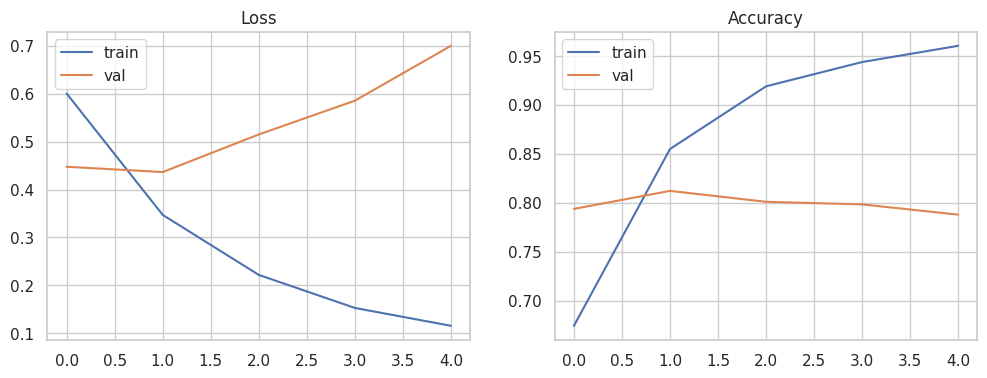

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))

ax[0].plot(history.history["loss"], label="train")
ax[0].plot(history.history["val_loss"], label="val")
ax[0].set_title("Loss"); ax[0].legend()

ax[1].plot(history.history["accuracy"], label="train")
ax[1].plot(history.history["val_accuracy"], label="val")
ax[1].set_title("Accuracy"); ax[1].legend()

plt.show()


In [ ]:
#Evaluation (metrics + confusion matrix)

48/48 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0      0.792     0.853     0.821       869
           1      0.782     0.702     0.740       654

    accuracy                          0.788      1523
   macro avg      0.787     0.777     0.780      1523
weighted avg      0.787     0.788     0.786      1523



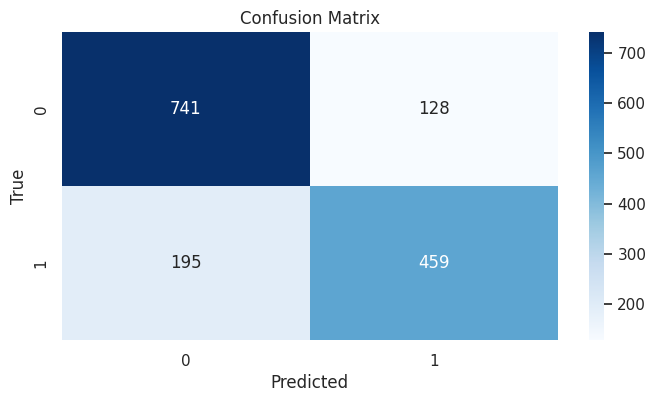

In [13]:
y_prob = model.predict(X_val)
y_pred = (y_prob > 0.5).astype("int32")

print(classification_report(y_val, y_pred, digits=3))

cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted"); plt.ylabel("True"); plt.title("Confusion Matrix")
plt.show()


In [ ]:
#Save artifacts

In [14]:
model.save("lstm_baseline.h5")
with open("training_history.json", "w") as f:
    json.dump(history.history, f)
print("Saved: lstm_baseline.h5 and training_history.json")


Saved: lstm_baseline.h5 and training_history.json


/home/u.mm336067/.local/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
